In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter

In [4]:
names = ['x', 'y', 'class']
df = pd.read_csv("./demo_data/3.concertriccir2.csv", header = None, names = names)
df.head()

,x,y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [5]:
D = df.iloc[:, 0:2]
print(type(D))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(D.head())

          x         y
0  0.700335 -0.247068
1 -3.950019  2.740080
2  0.150222 -2.157638
3 -1.672050 -0.941519
4  2.560483 -1.846577


In [7]:
Y = df['class']
print(Y[:5])

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: class, dtype: float64


In [8]:
D_TRAIN, D_test, Y_TRAIN, Y_test = train_test_split(D, Y, test_size = 0.3, random_state = 0)

In [9]:
d_train, d_cv, y_train, y_cv = train_test_split(D_TRAIN, Y_TRAIN, test_size = 0.3)

In [10]:
neighbors = list()
neighbors = [idx for idx in range(1, 30, 2)]

for neighbor in neighbors:

    knn_clf = KNeighborsClassifier(n_neighbors = neighbor)
    knn_clf.fit(d_train, y_train)
    
    y_hat = knn_clf.predict(d_cv)
    
    score = accuracy_score(y_cv, y_hat)*100
    
    print("CV Accuracy for k {} : {}\n".format(neighbor, score))

CV Accuracy for k 1 : 87.61904761904762

CV Accuracy for k 3 : 89.52380952380953

CV Accuracy for k 5 : 85.71428571428571

CV Accuracy for k 7 : 86.66666666666667

CV Accuracy for k 9 : 81.9047619047619

CV Accuracy for k 11 : 80.0

CV Accuracy for k 13 : 80.0

CV Accuracy for k 15 : 80.95238095238095

CV Accuracy for k 17 : 81.9047619047619

CV Accuracy for k 19 : 78.0952380952381

CV Accuracy for k 21 : 76.19047619047619

CV Accuracy for k 23 : 76.19047619047619

CV Accuracy for k 25 : 78.0952380952381

CV Accuracy for k 27 : 77.14285714285715

CV Accuracy for k 29 : 78.0952380952381



In [11]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(d_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
Y_hat = clf.predict(D_test)
print(Y_hat)

[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1.]


In [13]:
#accuracy_score(y_cv, y_hat, normalize = True)
np.sum(np.array(Y_hat) == np.array(Y_test))/Y_hat.size

0.8866666666666667

In [20]:
cv_scores = list()
#neighbors = [1, 3, 5]
for neighbor in neighbors:
    
    knn_clsfr = KNeighborsClassifier(n_neighbors = neighbor)
    
    scores = cross_val_score(knn_clsfr, d_train, y_train, cv =3, scoring = "accuracy")
    cv_scores.append(scores.mean())

print(cv_scores)

[0.8815617785807488, 0.8611362039546321, 0.820385426076483, 0.8246010237880158, 0.8125564588979223, 0.7963464819833384, 0.7799357623205861, 0.76367559971896, 0.7187092241292783, 0.6821238582756198, 0.6698283649503162, 0.6616982836495032, 0.6493526046371575, 0.6165813509986952, 0.6043862290474756]


#### Changing to missclassification error

In [26]:
mse = [np.round(1 - score, 3) for score in cv_scores]
print(mse)

[0.118, 0.139, 0.18, 0.175, 0.187, 0.204, 0.22, 0.236, 0.281, 0.318, 0.33, 0.338, 0.351, 0.383, 0.396]


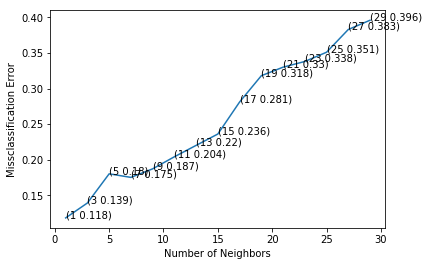

In [27]:
plt.plot(neighbors, mse)

for xy in zip(neighbors, mse):
    
    plt.annotate('(%s %s)' % xy, xy = xy, xycoords = "data")
    
plt.xlabel("Number of Neighbors")
plt.ylabel("Missclassification Error")
plt.show()

#### Determining optimal k

In [28]:
min_mse = min(mse)

In [29]:
min_mse_idx = mse.index(min_mse)

In [31]:
optimal_k = neighbors[min_mse_idx]
print(optimal_k)

1


#### KNN with optimal k Value

In [32]:
final_clsfr = KNeighborsClassifier(n_neighbors=optimal_k)
final_clsfr.fit(d_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [33]:
Y_hat = final_clsfr.predict(D_test)

In [34]:
test_score = accuracy_score(Y_test, Y_hat)
print(test_score)

0.9133333333333333
